Take Home Test Sertis

https://www.kaggle.com/c/the-winton-stock-market-challenge/data

Start time: Tuesday 2pm

Kawisorn Kamtue

In [1]:
import numpy as np
import pandas as pd
import random
from keras.optimizers import SGD
from keras import optimizers, regularizers, losses
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.constraints import unit_norm
#import theano.ifelse
#from theano.ifelse import IfElse, ifelse
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size c

Brief description: The goal of this challenge is to predict the future return of a stock during the day and the next two days, given the information on the past two day and the first half of the day. There are additional features that maybe relevant to the return of the stock. I approach this challenge using recurrent neural network Long-Short Term Memory (LSTM)

In [2]:
train_data = pd.read_csv("train.csv",delimiter=',')
number_of_samples = int(train_data.shape[0]/10) # Since the whole training process took very long, I will limit to smaller training set
print(train_data.columns.values)

['Id' 'Feature_1' 'Feature_2' 'Feature_3' 'Feature_4' 'Feature_5'
 'Feature_6' 'Feature_7' 'Feature_8' 'Feature_9' 'Feature_10' 'Feature_11'
 'Feature_12' 'Feature_13' 'Feature_14' 'Feature_15' 'Feature_16'
 'Feature_17' 'Feature_18' 'Feature_19' 'Feature_20' 'Feature_21'
 'Feature_22' 'Feature_23' 'Feature_24' 'Feature_25' 'Ret_MinusTwo'
 'Ret_MinusOne' 'Ret_2' 'Ret_3' 'Ret_4' 'Ret_5' 'Ret_6' 'Ret_7' 'Ret_8'
 'Ret_9' 'Ret_10' 'Ret_11' 'Ret_12' 'Ret_13' 'Ret_14' 'Ret_15' 'Ret_16'
 'Ret_17' 'Ret_18' 'Ret_19' 'Ret_20' 'Ret_21' 'Ret_22' 'Ret_23' 'Ret_24'
 'Ret_25' 'Ret_26' 'Ret_27' 'Ret_28' 'Ret_29' 'Ret_30' 'Ret_31' 'Ret_32'
 'Ret_33' 'Ret_34' 'Ret_35' 'Ret_36' 'Ret_37' 'Ret_38' 'Ret_39' 'Ret_40'
 'Ret_41' 'Ret_42' 'Ret_43' 'Ret_44' 'Ret_45' 'Ret_46' 'Ret_47' 'Ret_48'
 'Ret_49' 'Ret_50' 'Ret_51' 'Ret_52' 'Ret_53' 'Ret_54' 'Ret_55' 'Ret_56'
 'Ret_57' 'Ret_58' 'Ret_59' 'Ret_60' 'Ret_61' 'Ret_62' 'Ret_63' 'Ret_64'
 'Ret_65' 'Ret_66' 'Ret_67' 'Ret_68' 'Ret_69' 'Ret_70' 'Ret_71' 'Ret_72'
 'Re

Visualizing Data: Let's see the return of certain stock id during the current day D. Each plot shows the values of return for each stock during day D (current day)

      Ret_2     Ret_3     Ret_4     Ret_5     Ret_6     Ret_7     Ret_8  \
0  0.000003 -0.000734 -0.000738 -0.000007  0.000423  0.000438 -0.000076   
1 -0.000487  0.000475  0.000002 -0.000002 -0.000523 -0.000255 -0.000008   
2 -0.000782 -0.000402  0.000807  0.000400  0.000656 -0.001177  0.001198   

      Ret_9    Ret_10    Ret_11    ...      Ret_171   Ret_172   Ret_173  \
0  0.000645 -0.000006  0.000006    ...     0.001539 -0.000142  0.000861   
1  0.000048 -0.000312 -0.000742    ...    -0.000256 -0.000005 -0.000497   
2  0.000610 -0.001031  0.000647    ...     0.000656  0.000127  0.000255   

    Ret_174   Ret_175   Ret_176   Ret_177       Ret_178   Ret_179   Ret_180  
0  0.000544 -0.002688  0.002246 -0.000838 -6.953224e-04  0.000003 -0.001974  
1  0.000240 -0.000129  0.000123  0.000248  3.315418e-07  0.000003  0.000027  
2  0.000278 -0.000524 -0.000394  0.000116  5.322557e-04  0.000274  0.000784  

[3 rows x 179 columns]


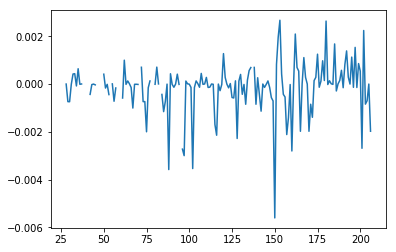

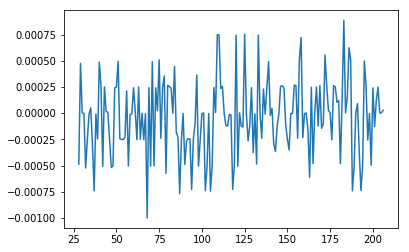

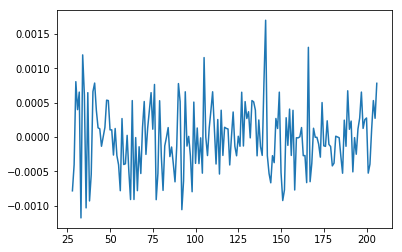

In [3]:
return_intraday = range(28,207)
plot_data = pd.read_csv('train.csv', usecols=return_intraday,nrows=3,engine='python')
print(plot_data)
plot_data = plot_data.as_matrix()
plt.plot(return_intraday,plot_data[0])
plt.show()
plt.plot(return_intraday,plot_data[1])
plt.show()
plt.plot(return_intraday,plot_data[2])
plt.show()

As shown by a discontinuity in the graph in the first figure, some of the return values are missing. This could potentially pose a problem in our learning. I propose a simple solution by generating a random value for each piece of missing data. For simplicity, I suppose the return of a stock at time t follows a normal distribution with mean mu_t and variance var_t. The first step is to calculate the mean and variance of a return at each time t

In [4]:
print("Average return on day {:3d} is {}".format(-2,np.mean(train_data['Ret_MinusTwo'])))
print("Average return on day {:3d} is {}".format(-1,np.mean(train_data['Ret_MinusOne'])))
for i in range(179):
    return_time = 'Ret_'+str(i+2)
    print("Average return at time {:3d} is {}".format(i+2,np.mean(train_data[return_time])))

mean_return = np.zeros(179)
var_return = np.zeros(179)

for i in range(179):
    return_index = 'Ret_' + str(i+2)
    return_val = []
    for j in range(number_of_samples):
        if not np.isnan(train_data[return_index][j]):
            return_val.append(train_data[return_index][j])
    mean_return[i] = np.mean(return_val)
    var_return[i] = np.var(return_val)

return_val = []    
for j in range(number_of_samples):
    if not np.isnan(train_data['Ret_MinusTwo'][j]):
         return_val.append(train_data['Ret_MinusTwo'][j])
mean_return_MinusTwo = np.mean(return_val)

return_val = []
for j in range(number_of_samples):
    if not np.isnan(train_data['Ret_MinusOne'][j]):
         return_val.append(train_data['Ret_MinusOne'][j])
mean_return_MinusOne = np.mean(return_val)
var_return_MinusOne = np.var(return_val)

return_val = []
for j in range(number_of_samples):
    if not np.isnan(train_data['Ret_PlusOne'][j]):
         return_val.append(train_data['Ret_PlusOne'][j])
mean_return_PlusOne = np.mean(return_val)
var_return_PlusOne = np.var(return_val)

return_val = []
for j in range(number_of_samples):
    if not np.isnan(train_data['Ret_PlusTwo'][j]):
         return_val.append(train_data['Ret_PlusTwo'][j])
mean_return_PlusTwo = np.mean(return_val)
var_return_PlusTwo = np.var(return_val)

        


Average return on day  -2 is 0.0007836268336738772
Average return on day  -1 is -0.0008027576837194955
Average return at time   2 is 5.600929964097924e-06
Average return at time   3 is -7.659483069096223e-06
Average return at time   4 is -6.279889253162564e-06
Average return at time   5 is -6.2834363174138054e-06
Average return at time   6 is -1.8984224415325966e-05
Average return at time   7 is 2.9526341948865973e-05
Average return at time   8 is 2.7525779334487215e-05
Average return at time   9 is 4.696042347144296e-07
Average return at time  10 is 3.901208945832982e-06
Average return at time  11 is -4.209643507272199e-06
Average return at time  12 is 4.886831579314892e-07
Average return at time  13 is 9.865051448965256e-06
Average return at time  14 is 2.8863943432209845e-05
Average return at time  15 is -4.626190742704074e-06
Average return at time  16 is -1.8947652525414632e-05
Average return at time  17 is -2.3325889096126154e-05
Average return at time  18 is -1.497827036366038e-

Similarly for features_1 to 25, some of the information are missing. We did the same thing. This might be ambiguous since we do not know exactly what do these values represent.

In [5]:
mean_features = np.zeros(25)
var_features = np.zeros(25)

for i in range(25):
    features_index = 'Feature_' + str(i+1)
    features_val = []
    for j in range(number_of_samples):
        if not np.isnan(train_data[features_index][j]):
            features_val.append(train_data[features_index][j])
    mean_features[i] = np.mean(features_val)
    var_features[i] = np.var(features_val)
print(mean_features)
print(var_features)

[ 3.44189383e+00 -8.93533037e-02  5.61740982e-01  4.07893068e-01
  5.43375000e+00  4.07532967e-01  4.87391700e+04  1.97294030e-01
  1.06894737e+01  4.72021750e+00 -5.76422369e-01  4.93136399e-01
  4.28240976e+00  1.59071585e+00  3.79264476e+00  1.00634840e+00
 -5.60232006e-01  8.09302487e-01 -1.21117325e+00  5.32537961e+00
  6.04703340e-01 -7.78394984e-01  8.49676931e-01 -1.18105432e+00
 -3.29858863e-01]
[7.48622195e+00 1.59949868e+00 8.13612294e-01 6.22270638e-01
 8.67361094e+00 1.97059677e+00 7.85451130e+08 1.88825171e-02
 8.14831025e+00 8.35216562e-01 1.55633171e+00 1.23789778e-01
 6.47921778e+00 9.96875354e-02 2.40384575e+01 6.30809802e-03
 8.20755787e-01 1.33492591e+00 4.14778008e-01 6.48848820e+00
 1.63247218e+00 1.96109892e+00 1.37641271e+00 2.76119002e+00
 9.27082403e-01]


Now that we have already calculated the mean and variance, we are ready to create a clean dataset

In [6]:
return_intraday = range(26,209)
clean_train_data = pd.read_csv('train.csv', usecols=return_intraday,nrows =number_of_samples, engine='python')
print(clean_train_data)
clean_train_data = clean_train_data.as_matrix()
print(clean_train_data.shape)
for j in range(number_of_samples):
    # Check if the ret_2 - ret_180 are well defined in training set
    for k in range(2,181):
        #if the value is not available, we generate a value from normal distribution
        if np.isnan(clean_train_data[j][k]):
            clean_train_data[j][k] = var_return[k-2]*np.random.randn() + mean_return[k-2]
     # Check if the ret_minus2 ret_minus1 ret_plusone ret_plustwo are well defined in training set       
    if np.isnan(clean_train_data[j][0]):
        clean_train_data[j][0] = var_return_MinusTwo*np.random.randn() + mean_return_MinusTwo       
    if np.isnan(clean_train_data[j][1]):
        clean_train_data[j][1] = var_return_MinusOne*np.random.randn() + mean_return_MinusOne    
    if np.isnan(clean_train_data[j][181]):
        clean_train_data[j][181] = var_return_PlusOne*np.random.randn() + mean_return_PlusOne 
    if np.isnan(clean_train_data[j][182]):
        clean_train_data[j][182] = var_return_PlusTwo*np.random.randn() + mean_return_PlusTwo 

#Normalizing the dataset.
return_scaler = MinMaxScaler(feature_range=(-1, 1))
clean_train_data = return_scaler.fit_transform(clean_train_data)



      Ret_MinusTwo  Ret_MinusOne         Ret_2     Ret_3     Ret_4  \
0         0.055275     -0.010770  2.954272e-06 -0.000734 -0.000738   
1         0.009748      0.002987 -4.871459e-04  0.000475  0.000002   
2         0.003077      0.006181 -7.822703e-04 -0.000402  0.000807   
3         0.000984      0.014106  2.773425e-04 -0.000088 -0.000199   
4        -0.018224      0.011065 -1.232316e-03  0.000002 -0.001205   
5         0.014473      0.007139 -5.736361e-06  0.000914 -0.000247   
6        -0.002893      0.006601  3.110509e-07 -0.000027 -0.000546   
7         0.004587      0.006156  1.761826e-04  0.000558 -0.000007   
8         0.002507     -0.015937 -3.981190e-04 -0.000180 -0.000168   
9         0.045577      0.043532 -3.707297e-03 -0.000614  0.001855   
10        0.027998     -0.002795 -7.413615e-04  0.000196  0.000380   
11        0.004803      0.046535  2.022003e-03 -0.001339  0.001338   
12       -0.010130     -0.009580 -4.636423e-04       NaN       NaN   
13        0.008704  

In [7]:
return_intraday = range(1,26)
clean_train_data_features = pd.read_csv('train.csv', usecols=return_intraday,engine='python')
print(clean_train_data_features)
clean_train_data_features = clean_train_data_features.as_matrix()
print(clean_train_data_features.shape)
for j in range(number_of_samples):
    for k in range(25):
        #if the value is not available, we generate a value from normal distribution
        if np.isnan(clean_train_data_features[j][k]):
            clean_train_data_features[j][k] = var_features[k]*np.random.randn() + mean_features[k]

print(clean_train_data_features)

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0            NaN        NaN        NaN        NaN        8.0        NaN   
1            NaN        NaN        NaN        NaN        3.0   0.388896   
2            NaN  -0.696727   0.739591  -0.167928        9.0   0.471947   
3            NaN  -0.694350   1.568248   0.479073        5.0   0.120653   
4            6.0  -1.736489   2.765531   1.245280        7.0   4.866985   
5            NaN        NaN  -0.680515        NaN        1.0   0.227034   
6            NaN  -0.230636  -0.227021  -0.084126        7.0  -0.095007   
7            NaN   2.582955   0.157344   0.617261        8.0  -0.177333   
8            NaN  -0.187950  -0.259820   0.047637        8.0  -0.381621   
9            NaN   2.883570   0.813783   0.796746        7.0   0.021982   
10           NaN   2.226944   0.442309        NaN        1.0   0.009146   
11           NaN   2.144114  -0.731070  -0.682722        8.0  -0.668712   
12           6.0   0.0412

[[-3.93847978e+00 -1.18376905e-03  7.50808617e-01 ...  1.82799969e+00
  -5.86786900e+00 -1.24513548e+00]
 [ 8.35340565e+00 -2.80302574e-01  2.41606963e-01 ...  1.23985602e+00
   9.53423827e-01 -7.09462287e-01]
 [-1.02208412e+01 -6.96726938e-01  7.39590680e-01 ...  1.72809555e+00
  -1.79808951e+00 -1.01937037e+00]
 ...
 [            nan             nan -9.14701346e-01 ... -1.77614322e-01
  -2.42630828e-02 -6.92075655e-02]
 [            nan -2.14569960e-02  1.02128415e+00 ...  1.41825848e+00
  -5.17231773e-01 -5.90398113e-01]
 [            nan  1.09386811e+00 -6.77391143e-01 ...  4.13312403e-01
   1.61746553e+00  7.73050337e-02]]


What we have to predict for the test data is the return of the stock during the day D for time t=120,..,180 and the return of day D+1 and D+2. Since there is an inconsistency in time interval (intraday vs. interday), we will implement two models separately. The first model will take the return during day D in the morning as input and predict for the returns later one during the day. The second model will take the return of day D-2, D-1, D as input and predict the return for the day D+1 and D+2. Both models will have the same structure. The sequential input (return of a stock) will be passed through LSTM. The output of LSTM will be combined with the features and passed through the final dense layers for prediction.

In [8]:
X_ret_train = []
X_feat_train = []
X_ret_day_train = []
X_feat_day_train = []
Y_ret_train = []
Y_ret_day_train = []
for j in range(number_of_samples):
    for k in range(121,181):
        X_ret_train.append(clean_train_data[j][k-119:k])
        X_feat_train.append(clean_train_data_features[j,:])
        Y_ret_train.append(clean_train_data[j][k])
    X_ret_day_train.append([clean_train_data[j][0],clean_train_data[j][1],np.mean(clean_train_data[j][2:181])])
    X_feat_day_train.append(clean_train_data_features[j,:])
    Y_ret_day_train.append(clean_train_data[j][181])
    X_ret_day_train.append([clean_train_data[j][1],np.mean(clean_train_data[j][2:181]),clean_train_data[j][181]])
    X_feat_day_train.append(clean_train_data_features[j,:])
    Y_ret_day_train.append(clean_train_data[j][182])
X_ret_train = np.array(X_ret_train) 
X_feat_train = np.array(X_feat_train)
X_ret_day_train = np.array(X_ret_day_train)
X_feat_day_train = np.array(X_feat_day_train)
Y_ret_train = np.array(Y_ret_train)
Y_ret_day_train = np.array(Y_ret_day_train)
    

Training the model for intraday prediction

In [9]:
(num_samples,max_len) = X_ret_train.shape
X_re_train = X_ret_train.reshape([X_ret_train.shape[0],X_ret_train.shape[1],1])

# Parameters
batchsize = 1000
nb_lstm_layers = 1
number_of_hidden_units = 10
activation_function='tanh'
number_of_dense_layers = 2
dropout_pct = 0.2
epochs =  2
number_of_hidden_units_LSTM = 10

input1 = Input(shape =(max_len,1))
x1 = input1
# LSTM layers
for _ in range(nb_lstm_layers):
    x1 = LSTM(number_of_hidden_units_LSTM,return_sequences=True,
                        activation='relu', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        activity_regularizer=None, kernel_constraint=unit_norm(), recurrent_constraint=unit_norm(), bias_constraint=None,
                        dropout=0.0, recurrent_dropout=0.0, return_state=False, go_backwards=False, stateful=False, unroll=True)(x1)
# Dense layers
x1 = LSTM(number_of_hidden_units_LSTM,return_sequences=False,activation='relu', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        activity_regularizer=None, kernel_constraint=unit_norm(), recurrent_constraint=unit_norm(), bias_constraint=None,
                        dropout=0.0, recurrent_dropout=0.0, return_state=False, go_backwards=False, stateful=False, unroll=True)(x1)

input2 = Input(shape =(X_feat_train.shape[1],))
x2 = Dense(10)(input2)
x2 = Activation(activation_function)(x2)

added = Concatenate()([x1,x2])
for _ in range(number_of_dense_layers):
    added = Dense(number_of_hidden_units, init='uniform')(added)
    added = Activation(activation_function)(added)
    added = Dropout(dropout_pct)(added)

out = Dense(1)(added)

model = Model(inputs = [input1,input2], outputs = out)
#sgd = SGD(lr=0.1)
#model.compile(optimizer=sgd, loss='mse')
model.compile(loss='mean_squared_error',optimizer='adam')

print(model.summary())
model.fit([X_re_train, X_feat_train],Y_ret_train,epochs = epochs,verbose=1,batch_size=batchsize,validation_split=0.3)



/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 119, 1)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 119, 10)      480         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           260         input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LS

Training the model for interday prediction

In [10]:
(num_samples,max_len) = X_ret_day_train.shape
X_re_train = X_ret_day_train.reshape([X_ret_day_train.shape[0],X_ret_day_train.shape[1],1])

# Parameters
batchsize = 1000
nb_lstm_layers = 1
number_of_hidden_units = 10
activation_function='tanh'
number_of_dense_layers = 2
dropout_pct = 0.2
epochs =  2
number_of_hidden_units_LSTM = 10

input1 = Input(shape =(max_len,1))
x1 = input1
# LSTM layers
for _ in range(nb_lstm_layers):
    x1 = LSTM(number_of_hidden_units_LSTM,return_sequences=True,
                        activation='relu', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        activity_regularizer=None, kernel_constraint=unit_norm(), recurrent_constraint=unit_norm(), bias_constraint=None,
                        dropout=0.0, recurrent_dropout=0.0, return_state=False, go_backwards=False, stateful=False, unroll=True)(x1)
# Dense layers
x1 = LSTM(number_of_hidden_units_LSTM,return_sequences=False,activation='relu', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
                        activity_regularizer=None, kernel_constraint=unit_norm(), recurrent_constraint=unit_norm(), bias_constraint=None,
                        dropout=0.0, recurrent_dropout=0.0, return_state=False, go_backwards=False, stateful=False, unroll=True)(x1)

input2 = Input(shape =(X_feat_day_train.shape[1],))
x2 = Dense(10)(input2)
x2 = Activation(activation_function)(x2)

added = Concatenate()([x1,x2])
for _ in range(number_of_dense_layers):
    added = Dense(number_of_hidden_units, init='uniform')(added)
    added = Activation(activation_function)(added)
    added = Dropout(dropout_pct)(added)

out = Dense(1)(added)

model_day = Model(inputs = [input1,input2], outputs = out)
sgd = SGD(lr=0.1)
#model.compile(optimizer=sgd, loss='mse')
model_day.compile(loss='mean_squared_error',optimizer='sgd')

print(model.summary())
model_day.fit([X_re_train, X_feat_day_train],Y_ret_day_train,epochs = epochs,verbose=1,batch_size=batchsize)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 119, 1)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 119, 10)      480         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           260         input_2[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LS

Visualizing some of the output: The prediction vs the truth values for return of the stock during the day

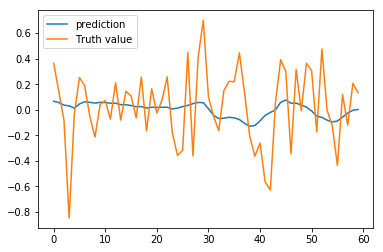

In [21]:
X_plot = X_ret_train[:60,:]
truth_value = Y_ret_train[:60]
X_re_plot = X_plot.reshape([X_plot.shape[0],X_plot.shape[1],1])
prediction = model.predict([X_re_plot,X_feat_train[:60,:]])

plt.plot(prediction,label="prediction") # blue line
plt.plot(truth_value,label="Truth value") # orange line
plt.legend(loc='upper left')
plt.show()

The result is still far from perfect in term of accuracy. However we can see that some of the peaks in prediction correspond to the peak in truth values.

In [12]:
'''test_data = pd.read_csv("test_2.csv",delimiter=',')
number_of_samples_test = test_data.shape[0]

file = open('submission.csv',"w")
file.write("Id,Predicted\n")
for j in range(number_of_samples_test):
    # The vector return_value will store the return value at each time step, excluding D-2,D-1
    return_value = np.zeros(179)
    # The vector features_value will store the features value for that particular store
    features_value = np.zeros(25)
    for k in range(119):
        timestamp = 'Ret_'+str(k+2)
        # Check if the value given is available
        if np.isnan(test_data[timestamp][j]):
            return_value[k] = var_return[k]*np.random.randn() + mean_return[k]
        else:
            return_value[k] = test_data[timestamp][j]
    for k in range(25):
        features_index = 'Feature_' + str(k+1)
        # if the value is not available, we generate a value from normal distribution
        if np.isnan(test_data[features_index][j]):
            features_value[k] = var_features[k]*np.random.randn(1) + mean_features[k]
        else:
            features_value[k] = test_data[features_index][j]
    for k in range(120,178):
        X_return_test = np.array([return_value[k-119:k]])
        X_return_test = X_return_test.reshape([1,119,1])
        X_features_test = np.array([features_value])
        
        return_k = model.predict([X_return_test,X_features_test])
        file.write(str(test_data['Id'][j])+'_'+str(k-119)+',')
        file.write(str(return_k[0][0])+'\n')
        return_value[k] = return_k
    return_day = []
    if np.isnan(test_data['Ret_MinusTwo'][j]):
        return_day.append(var_return_MinusTwo*np.random.randn() + mean_return_MinusTwo)
    else:
        return_day.append(test_data['Ret_MinusTwo'][j])
        
    if np.isnan(test_data['Ret_MinusOne'][j]):
        return_day.append(var_return_MinusOne*np.random.randn() + mean_return_MinusOne)
    else:
        return_day.append(test_data['Ret_MinusOne'][j])
        
    return_day.append(np.mean(return_value))
    
    
    input1 = np.array(return_day).reshape([1,3,1])
    return_day_PlusOne = model_day.predict([input1,X_feat_day_train])
    file.write(str(test_data['Id'][j])+'_'+str('61,'))
    file.write(str(return_day_PlusOne[0][0])+'\n')
    
    return_day.append(return_day_PlusOne[0][0])
    input2 = np.array(return_day[1:]).reshape([1,3,1])
    return_day_PlusTwo = model_day.predict([input2,X_feat_day_train])
    file.write(str(test_data['Id'][j])+'_'+str('62,'))
    file.write(str(return_day_PlusTwo[0][0])+'\n')
file.close()
        
'''


'test_data = pd.read_csv("test_2.csv",delimiter=\',\')\nnumber_of_samples_test = test_data.shape[0]\n\nfile = open(\'submission.csv\',"w")\nfile.write("Id,Predicted\n")\nfor j in range(number_of_samples_test):\n    # The vector return_value will store the return value at each time step, excluding D-2,D-1\n    return_value = np.zeros(179)\n    # The vector features_value will store the features value for that particular store\n    features_value = np.zeros(25)\n    for k in range(119):\n        timestamp = \'Ret_\'+str(k+2)\n        # Check if the value given is available\n        if np.isnan(test_data[timestamp][j]):\n            return_value[k] = var_return[k]*np.random.randn() + mean_return[k]\n        else:\n            return_value[k] = test_data[timestamp][j]\n    for k in range(25):\n        features_index = \'Feature_\' + str(k+1)\n        # if the value is not available, we generate a value from normal distribution\n        if np.isnan(test_data[features_index][j]):\n          